# Create Group Report

Notes on data files:
- THO: 5 additional sessions not converted
- THF: 3 additional sessions not converted

In [1]:
%config Completer.use_jedi = False

In [2]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

from pynwb import NWBHDF5IO
from convnwb.io import get_files

from spiketools.plts.data import plot_hist
from spiketools.plts.utils import make_axes

In [3]:
import seaborn as sns
sns.set_context('talk')

In [4]:
import sys
sys.path.append('../code')
from reports import create_group_info, create_group_str, create_group_sessions_str

## Settings

In [5]:
# Set which task to analyze
task = 'THO'

In [6]:
# Define the base data folder
data_folder = Path('/Users/tom/Documents/Data/JacobsLab/TH/' + task)

In [7]:
# Get the list of 
nwbfiles = get_files(data_folder / 'NWB')

## Collect Summary Information

In [8]:
# Define summary data to collect
summary = {
    'ids' : [],
    'n_trials' : [],
    'n_units' : [],
    'error' : [],
    'correct' : []
}

In [9]:
for nwbfile in nwbfiles:
    
    # Load NWB file
    io = NWBHDF5IO(str(data_folder / 'NWB' / nwbfile), 'r')
    nwbfile = io.read()

    # Get the subject & session ID from file
    subj_id = nwbfile.subject.subject_id
    session_id = nwbfile.session_id
    
    # Collect summary information
    summary['ids'].append(session_id)
    summary['n_trials'].append(len(nwbfile.trials))
    summary['n_units'].append(len(nwbfile.units))
    
    summary['error'].append(np.median(nwbfile.trials.error[:]))
    summary['correct'].append(np.mean(nwbfile.trials.correct[:]) * 100)

## Check individual sessions

In [10]:
# Create detailed information for each session
print('\n'.join(create_group_sessions_str(summary)))

wv001-session_0: 111 units,  23 trials (53.45% correct, average error of 11.82)
wv001-session_2: 118 units,  23 trials (46.55% correct, average error of 13.72)
wv002-session_2:  59 units,  23 trials (21.05% correct, average error of 30.23)
wv003-session_0:  39 units,  23 trials ( 8.77% correct, average error of 35.28)
wv003-session_1:  47 units,  23 trials (22.41% correct, average error of 27.68)
wv004-session_0: 138 units,  31 trials (55.84% correct, average error of 11.66)
wv004-session_1:  78 units,  23 trials (70.69% correct, average error of  8.65)
wv004-session_2:  83 units,  23 trials (45.61% correct, average error of 13.93)


## Create Report

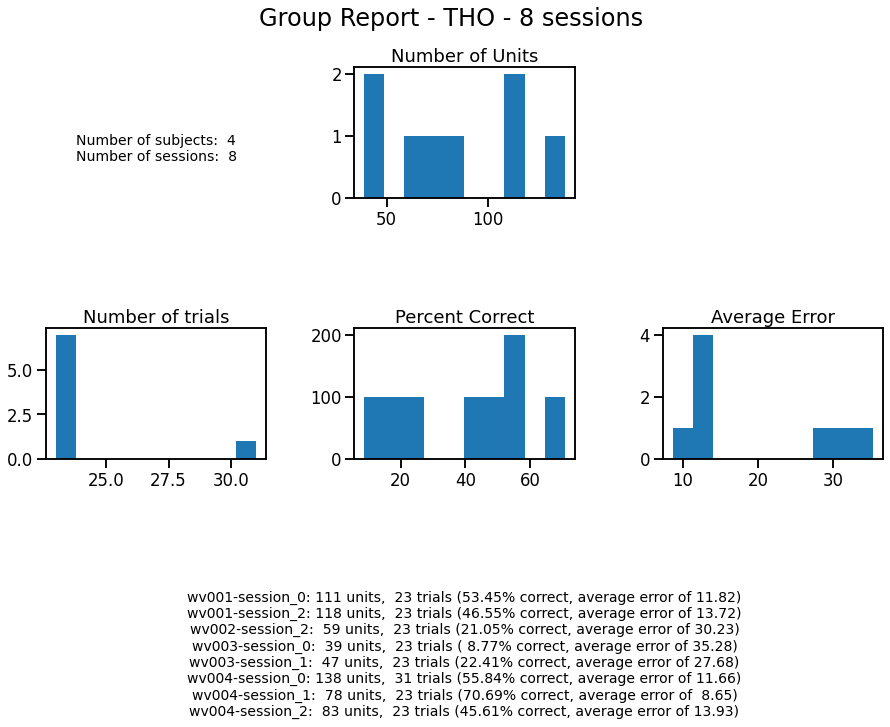

In [11]:
# Initialize figure
_ = plt.figure(figsize=(15, 12))
grid = gridspec.GridSpec(3, 3, wspace=0.4, hspace=1.0)
plt.suptitle('Group Report - {} - {} sessions'.format(task, len(summary['ids'])), fontsize=24, y=0.95);

# 00: group text
ax00 = plt.subplot(grid[0, 0])
subject_text = create_group_str(create_group_info(summary))
ax00.text(0.5, 0.5, subject_text, fontdict={'fontsize' : 14}, ha='center', va='center');
ax00.axis('off');

# 01: neuron firing 
ax01 = plt.subplot(grid[0, 1])
plot_hist(summary['n_units'], title='Number of Units', ax=ax01)

# 10-12: behavioural data
ax10 = plt.subplot(grid[1, 0])
plot_hist(summary['n_trials'], title='Number of trials', ax=ax10)
ax11 = plt.subplot(grid[1, 1])
plot_hist(summary['correct'] * 100, title='Percent Correct', ax=ax11)
ax12 = plt.subplot(grid[1, 2])
plot_hist(summary['error'], title='Average Error', ax=ax12)

# 21: detailed session strings
ax21 = plt.subplot(grid[2, 1])
session_text = '\n'.join(create_group_sessions_str(summary))
ax21.text(0.5, 0.5, session_text, fontdict={'fontsize' : 14}, ha='center', va='center');
ax21.axis('off');